
----- Logistic Regression -----
Confusion Matrix:
[[2129  157]
 [ 455  259]]

Classification Report:
              precision    recall  f1-score   support

           0      0.824     0.931     0.874      2286
           1      0.623     0.363     0.458       714

    accuracy                          0.796      3000
   macro avg      0.723     0.647     0.666      3000
weighted avg      0.776     0.796     0.775      3000


----- Decision Tree -----
Confusion Matrix:
[[2234   52]
 [  25  689]]

Classification Report:
              precision    recall  f1-score   support

           0      0.989     0.977     0.983      2286
           1      0.930     0.965     0.947       714

    accuracy                          0.974      3000
   macro avg      0.959     0.971     0.965      3000
weighted avg      0.975     0.974     0.974      3000


----- Random Forest -----
Confusion Matrix:
[[2283    3]
 [  25  689]]

Classification Report:
              precision    recall  f1-score   suppor

/Users/brycesmith/Desktop/HR_Turnover_Project_test/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [00:53:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


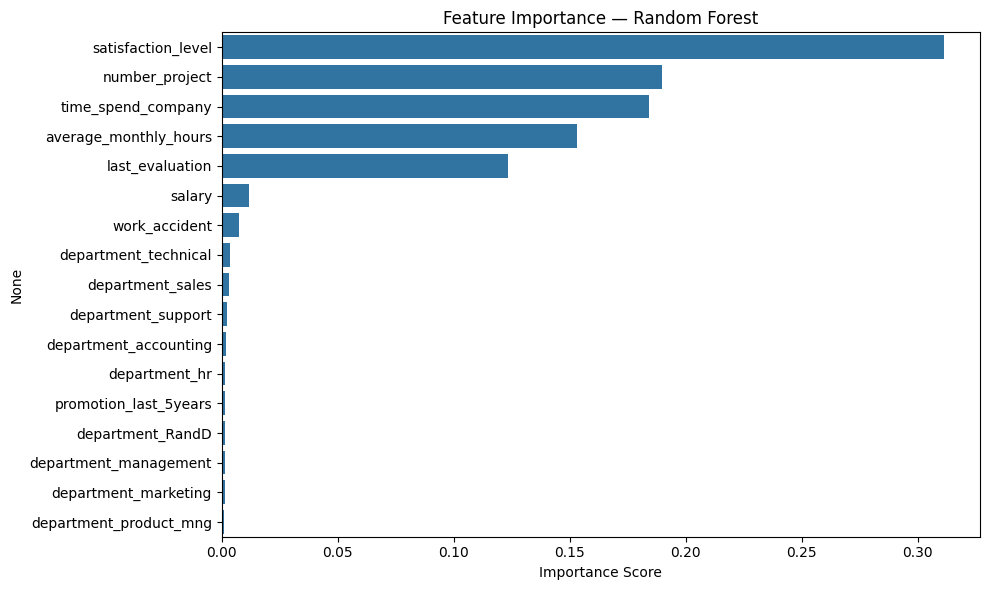

<Figure size 600x500 with 0 Axes>

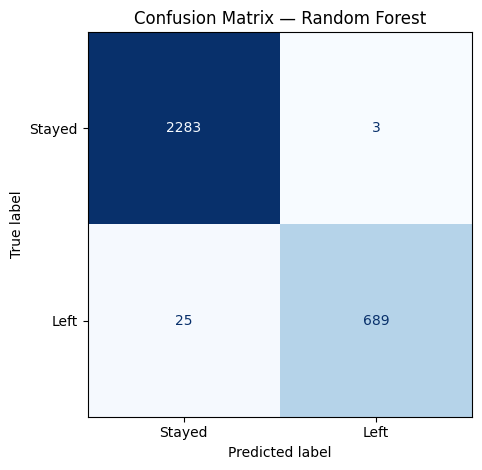

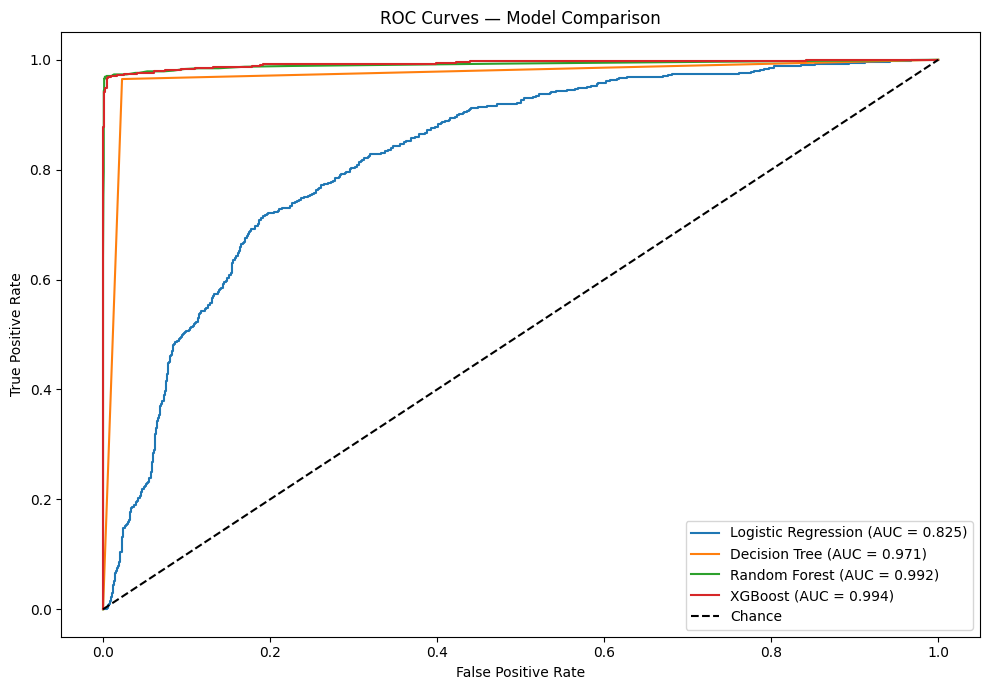

In [1]:
# HR Turnover Prediction Project

# ## 1. Introduction
# This notebook presents an end-to-end workflow for predicting employee turnover using machine learning.
# We will explore and visualize the data, preprocess it, train multiple models, and evaluate their performance.

# ## 2. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from models import load_data

# ## 3. Load and Prepare Data
df = load_data("data/HR_capstone_dataset.csv")
X = df.drop("left", axis=1)
y = df["left"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ## 4. Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

trained_models = {}
for name, model in models.items():
    print(f"\n----- {name} -----")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    trained_models[name] = model

# ## 5. Visualizations

# ### 5.1 Feature Importance — Random Forest
rf_model = trained_models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importance — Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("plots/feature_importance_rf.png")
plt.show()

# ### 5.2 Confusion Matrix — Random Forest
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay.from_estimator(
    rf_model, X_test, y_test,
    display_labels=["Stayed", "Left"],
    cmap="Blues", colorbar=False
)
disp.ax_.set_title("Confusion Matrix — Random Forest")
plt.tight_layout()
plt.savefig("plots/confusion_matrix_rf.png")
plt.show()

# ### 5.3 ROC Curves
plt.figure(figsize=(10, 7))
for name, model in trained_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.title("ROC Curves — Model Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.savefig("plots/roc_curves.png")
plt.show()

# ## 6. Summary
# - Random Forest and XGBoost were the top performing models.
# - Satisfaction level and number of projects were the most important predictors.
# - Visualizations like confusion matrices and ROC curves validate model performance.

In [2]:
df_cleaned.to_csv("data/employee_turnover_summary.csv", index=False)


NameError: name 'df_cleaned' is not defined

In [3]:
df.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [4]:
df.to_csv("employee_turnover_summary.csv", index=False)
